# 과제1 - WEEK3
## Name 특징에서 유용한 정보 남기고 kdeplot 사용하기

과제1은 Challenge1에 이어집니다.

---

In [1]:
import pandas as pd

df = pd.read_csv('data/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
df[['Sex', 'Age', 'SibSp', 'Parch']].head()

,Sex,Age,SibSp,Parch
0,male,22.0,1,0
1,female,38.0,1,0
2,female,26.0,0,0
3,female,35.0,1,0
4,male,35.0,0,0


---

## 특징 생성

In [3]:
# 테스트셋
df_test = pd.read_csv('data/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Age

In [4]:
# 전체 나이 평균, 즉 df['Age'].mean()을 빈칸에 넣기
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [5]:
# 테스트셋에도 똑같이 적용해야함
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean());
# 마지막에 ; 을 뒤에 붙이면 out에 결과표시 생략

In [6]:
df.loc[df['Age'] < 10, 'Age'] = 0
df.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >= 50, 'Age'] = 5

In [7]:
df_test.loc[df['Age'] < 10, 'Age'] = 0
df_test.loc[(df['Age'] >= 10) & (df['Age'] < 20), 'Age'] = 1
df_test.loc[(df['Age'] >= 20) & (df['Age'] < 30), 'Age'] = 2
df_test.loc[(df['Age'] >= 30) & (df['Age'] < 40), 'Age'] = 3
df_test.loc[(df['Age'] >= 40) & (df['Age'] < 50), 'Age'] = 4
df_test.loc[df['Age'] >= 50, 'Age'] = 5

## FamilySize

In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0


In [9]:
# 테스트셋도 똑같이 적용
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

In [10]:
# 더이상 필요 없는 열은 버리고, 필요한 필드만 남기기
train = df[['Survived', 'Sex', 'Age', 'FamilySize']]
test = df_test[['Sex', 'Age', 'FamilySize']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize
0,0,male,2.0,1
1,1,female,3.0,1
2,1,female,2.0,0
3,1,female,3.0,1
4,0,male,3.0,0


## Fare

In [11]:
# 운임도 빈칸(NaN)을 운임평균으로 채우기
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [13]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## Embarked

In [14]:
df['Embarked'] = df['Embarked'].fillna('S')
df_test['Embarked'] = df_test['Embarked'].fillna('S')

In [15]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
dtype: int64

In [16]:
# 필요한 필드만 남기기
train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,male,2.0,1,7.2500,S
1,1,female,3.0,1,71.2833,C
2,1,female,2.0,0,7.9250,S
3,1,female,3.0,1,53.1000,S
4,0,male,3.0,0,8.0500,S


---
## Features to Numeric

In [17]:
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df_test.loc[df_test['Sex'] == 'male', 'Sex'] = 0
df_test.loc[df_test['Sex'] == 'female', 'Sex'] = 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,S,0


In [18]:
df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

df_test.loc[df_test['Embarked'] == 'S', 'Embarked'] = 0
df_test.loc[df_test['Embarked'] == 'C', 'Embarked'] = 1
df_test.loc[df_test['Embarked'] == 'Q', 'Embarked'] = 2

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,0,0


In [19]:
train = df[['Survived', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']]
test = df_test[['Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']] # test데이터는 애초에 Survived가 없음

train.head()

,Survived,Sex,Age,FamilySize,Fare,Embarked
0,0,0,2.0,1,7.2500,0
1,1,1,3.0,1,71.2833,1
2,1,1,2.0,0,7.9250,0
3,1,1,3.0,1,53.1000,0
4,0,0,3.0,0,8.0500,0


---
## Name의 빈칸(NaN)을 3으로 채워 넣기
## 미션$1

In [20]:
df[['Name', 'Age']].head(10)

,Name,Age
0,"Braund, Mr. Owen Harris",2.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.0
2,"Heikkinen, Miss. Laina",2.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.0
4,"Allen, Mr. William Henry",3.0
5,"Moran, Mr. James",2.0
6,"McCarthy, Mr. Timothy J",5.0
7,"Palsson, Master. Gosta Leonard",0.0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2.0
9,"Nasser, Mrs. Nicholas (Adele Achem)",1.0


In [21]:
# 쉬운 방법) 전체 나이 평균을 넣기 - stage2 기준
# df['Age'].fillna(df['Age'].mean())

# 개선된 방법) 이름에 들어가는 Mr. Mrs. Miss. 타이틀 정보 뽑기
df.loc[ df['Name'].str.contains('Mr\.'), 'Name' ] = 'Mr'
df.loc[ df['Name'].str.contains('Mrs\.'), 'Name' ] = 'Mrs'
df.loc[ df['Name'].str.contains('Miss\.'), 'Name' ] = 'Miss'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,Mr,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Mrs,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,Miss,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,Mrs,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Mr,0,3.0,0,0,373450,8.0500,NaN,0,0


In [22]:
df['Name'] = df['Name'].map({
    'Mr': 0,
    'Mrs': 1,
    'Miss': 2
})

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,5.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,NaN,0,0.0,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,1.0,1,0,237736,30.0708,NaN,1,1


In [23]:
df['Name'] = df['Name'].fillna(3)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,5.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,3.0,0,0.0,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,1.0,1,0,237736,30.0708,NaN,1,1


In [24]:
df['Name'].value_counts()

0.0    517
2.0    182
1.0    125
3.0     67
Name: Name, dtype: int64

In [25]:
df['Age'] = df['Age'].fillna( df.groupby('Name')['Age'].transform('mean') )
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0.0,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0.0,0,5.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,3.0,0,0.0,3,1,349909,21.0750,NaN,0,4
8,9,1,3,1.0,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1.0,1,1.0,1,0,237736,30.0708,NaN,1,1


## 미션$2

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

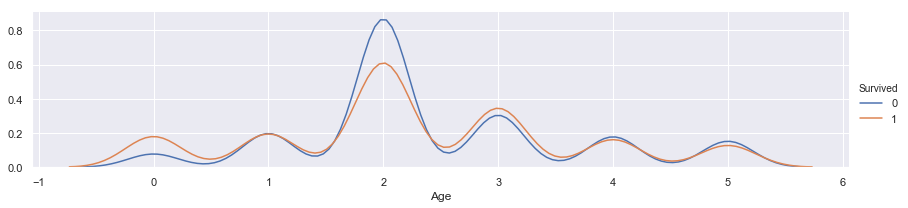

In [27]:
facet = sns.FacetGrid(df, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()

plt.show()